<a href="https://colab.research.google.com/github/julia-lina-tan/rl-policy-fusion/blob/main/classification_nn_fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make neural nets for Image Classification

Download MNIST dataset of handwritten digits.



In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Make a binary classifier that can detect 0's vs all other digits. 
0's will be classified as class=1, while non-0's will be classified as class=0. 

We will remove 1's from this dataset.

In [ ]:
import numpy as np

to_classify = 0
to_remove = 1

x_train = x_train[np.argwhere(y_train != to_remove).squeeze()]
y_train = y_train[y_train != to_remove]

y_train = np.array(list(map(lambda x: x==to_classify, y_train))).astype(int)
y_test = np.array(list(map(lambda x: x==to_classify, y_test))).astype(int)
print(y_train)

[0 1 0 ... 0 0 0]


Visualise using matplotlib.

1


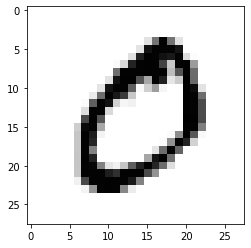

In [ ]:
import matplotlib.pyplot as plt
image_index = 1 # You may select anything up to 60,000
print(y_train[image_index]) # Display the label
plt.imshow(x_train[image_index], cmap='Greys')

There are originally 60,000 images in the train dataset, where each image is 28 x 28 pixels.

In [ ]:
print(x_train.shape)

(53258, 28, 28)


Flatten the images to be input vectors.

In [ ]:
from keras.datasets import mnist

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Balance training data.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Majority class will have twice as many samples as minority class
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_train, y_train = undersample.fit_resample(x_train, y_train)

print(x_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


(17769, 784)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Make predictions as a one-hot encoded vector.

In [ ]:
from keras.utils import to_categorical

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Build the neural net with a single hidden layer of 32 nodes:

* From the input layer to the hidden layer there are 784\*32 = 25,088 weights. 
* The hidden layer has 32 nodes so there are 32 biases bringing us to 25,088 + 32 = 25,120 parameters.
* From the hidden layer to the output layer there are 32\*2 = 64 weights.
* Each of the two nodes adds a single bias bringing us to 25,120 + 64 + 2 = 25,186 total parameters.

In [ ]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 2 # binary classifier

model_zeros = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model_zeros.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model_zeros.add(Dense(units=num_classes, activation='softmax'))
model_zeros.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 25,186
Trainable params: 25,186
Non-trainable params: 0
_________________________________________________________________


Train and evaluate the model.

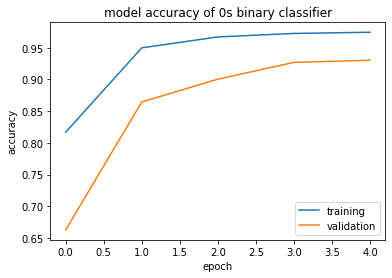

Test loss: 0.0822
Test accuracy: 0.986


In [ ]:
model_zeros.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = model_zeros.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model_zeros.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of 0s binary classifier')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Make a binary classifier that can detect 1's vs all other digits.
1's will be classified as class=1, while non-1's will be classified as class=0.

We will remove 0's from this dataset.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

to_classify = 1
to_remove = 0

x_train = x_train[np.argwhere(y_train != to_remove).squeeze()]
y_train = y_train[y_train != to_remove]

y_train = np.array(list(map(lambda x: x==to_classify, y_train))).astype(int)
y_test = np.array(list(map(lambda x: x==to_classify, y_test))).astype(int)
print(y_train)

[0 0 1 ... 0 0 0]


Visualise using matplotlib.

1


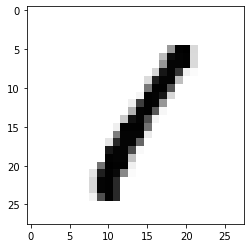

In [ ]:
image_index = 2 # You may select anything up to 60,000
print(y_train[image_index]) # Display the label
plt.imshow(x_train[image_index], cmap='Greys')

Flatten the images to be input vectors.

In [ ]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Balance training data.

In [ ]:
# Majority class will have twice as many samples as minority class
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_train, y_train = undersample.fit_resample(x_train, y_train)

print(x_train.shape)

(20226, 784)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Make predictions as a one-hot encoded vector.

In [ ]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training labels as one-hot encoded vectors:\n", y_train[:5])

First 5 training labels as one-hot encoded vectors:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Build the neural net.

In [ ]:
image_size = 784 # 28*28
num_classes = 2 # binary classifier

model_ones = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model_ones.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model_ones.add(Dense(units=num_classes, activation='softmax'))
model_ones.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 25,186
Trainable params: 25,186
Non-trainable params: 0
_________________________________________________________________


Train and evaluate the model.


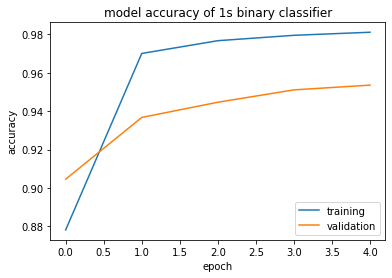

Test loss: 0.0713
Test accuracy: 0.991


In [ ]:
model_ones.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = model_ones.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model_ones.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of 1s binary classifier')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Get layer weights for each model

Since both have the same network architecture:
* Input layer to hidden layer weights: 784 x 32, where hidden layer has 32 nodes
* Hidden layer to output layer weights: 32 x 2, where output layer has 2 nodes

In [ ]:
layer_weights_zeros = [layer.get_weights()[0] for layer in model_zeros.layers]
layer_weights_ones = [layer.get_weights()[0] for layer in model_ones.layers]

# Tranpose each layer so that the rows correspond to the weights for each node 
layer_weights_zeros = [layer.transpose() for layer in layer_weights_zeros]
layer_weights_ones = [layer.transpose() for layer in layer_weights_ones]

# Align layers using OT

Compute the OT transport map between the weights, then align the matching nodes to each other using this map.

In [ ]:
# Install optimal transport requirements
!pip install pot
import ot

     |████████████████████████████████| 440kB 8.3MB/s 


Compute transport map.

In [ ]:
def align_nodes(layer_weights_all, stop_layer_k=2):
    
    # Compute layer-wise transport maps
    for i in range(stop_layer_k):

        # Align other nets (source) to first net (target)
        for j in range(1, len(layer_weights_all)):
            Xs = layer_weights_all[j][i]
            Xt = layer_weights_all[0][i]

            # Reorganise source weights according to previous layer alignment
            if i > 0:
              for pos, w in enumerate(Xs):
                Xs[pos] = w[alignment_idx]

            # Compute optimal transport map using EMD, since matching whole nodes
            ot_emd = ot.da.EMDTransport()
            ot_emd.fit(Xs=Xs, Xt=Xt)

            # Get source net aligned to node positions of target net
            aligned_Xs = ot_emd.inverse_transform(Xt=Xt)

            # Replace original with aligned 
            layer_weights_all[j][i] = aligned_Xs

            # Save as previous layer alignment
            alignment_idx = []
            for w in range(Xs.shape[0]):
              idx = np.argwhere(aligned_Xs == Xs[w])[0][0]
              alignment_idx.append(idx)

    return layer_weights_all


layer_weights_all = [layer_weights_zeros, layer_weights_ones]
aligned_layer_weights_all = align_nodes(layer_weights_all, stop_layer_k=2)

# Fuse neural nets 
Fuse the weights using averaging.

In [ ]:
def fuse_weights(aligned_layer_weights_all):

    n_nets = len(aligned_layer_weights_all)
    sum_weights = np.sum(aligned_layer_weights_all, axis=0)
    return sum_weights/n_nets

fused_weights = fuse_weights(aligned_layer_weights_all)

# Tranpose each layer back to the original format
fused_weights = [layer.transpose() for layer in fused_weights]

# Make a new model from fused layers
image_size = 784 
num_classes = 2 
fused_model = Sequential()
fused_model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
fused_model.add(Dense(units=num_classes, activation='softmax'))

for i, layer in enumerate(fused_model.layers):
    new_weights = layer.get_weights()
    new_weights[0] = fused_weights[i]
    fused_model.layers[i].set_weights(new_weights)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


# Evaluate the fused model without retraining

The fused model will act as a binary classifier than can detects 0's or 1's (class 1) vs all other digits (class 0).

In [ ]:
to_classify = [0, 1]

_, (x_test, y_test) = tf.keras.datasets.mnist.load_data()
y_test = np.array(list(map(lambda x: x in to_classify, y_test))).astype(int)

# Flatten the input images
image_vector_size = 28*28
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Convert output to "one-hot" vectors 
num_classes = 2
y_test = to_categorical(y_test, num_classes)

# Compile and test the model
fused_model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
loss, accuracy  = fused_model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.48
Test accuracy: 0.793


Visualise predictions using matplotlib.

0


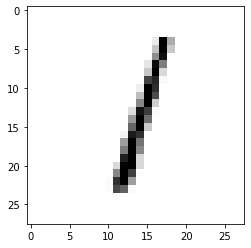

In [ ]:
predicted = fused_model.predict(x_test)
_, (x_test_og, _) = tf.keras.datasets.mnist.load_data()
image_index = 2
print(np.argmax(predicted[image_index])) # Display the label
plt.imshow(x_test_og[image_index], cmap='Greys')

# Retrain the fused model

We will retrain the fused model and compare the number of epochs required to reach the same accuracy as training a model from scratch.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

y_train = np.array(list(map(lambda x: x==0 or x==1, y_train))).astype(int)
y_test = np.array(list(map(lambda x: x==0 or x==1, y_test))).astype(int)

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Majority class will have twice as many samples as minority class
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_train, y_train = undersample.fit_resample(x_train, y_train)

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Training model from scratch

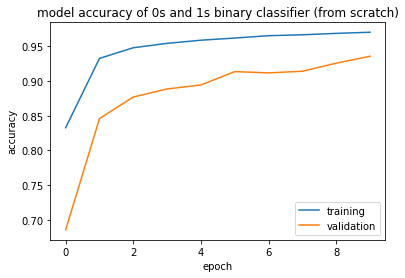

[0.8326363563537598, 0.9324462413787842, 0.9477701187133789, 0.9540868401527405, 0.9586196541786194, 0.9617195725440979, 0.9651118516921997, 0.9664278626441956, 0.9684456586837769, 0.9700833559036255]
Test loss: 0.0933
Test accuracy: 0.976


In [ ]:
# Build the neural net
image_size = 784 # 28*28
num_classes = 2 # binary classifier

new_model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
new_model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
new_model.add(Dense(units=num_classes, activation='softmax'))

# Train and evaluate the model
new_model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = new_model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=False, validation_split=.1)
loss, accuracy  = new_model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of 0s and 1s binary classifier (from scratch)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(history.history['accuracy'])
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Retraining

Retrain fused model:

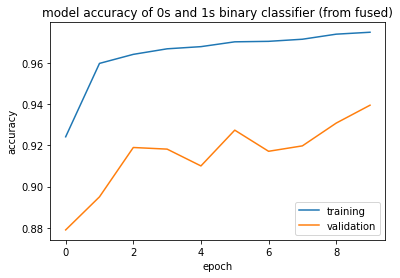

[0.9241409301757812, 0.9597601890563965, 0.9641467928886414, 0.9668372273445129, 0.9678900241851807, 0.9702295660972595, 0.9704635143280029, 0.9714870452880859, 0.9739435315132141, 0.9748793840408325]
Test loss: 0.0821
Test accuracy: 0.98


In [ ]:
# Retrain and evaluate the model
history = fused_model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=False, validation_split=.1)
loss, accuracy  = fused_model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of 0s and 1s binary classifier (from fused)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(history.history['accuracy'])
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Retraining original models:

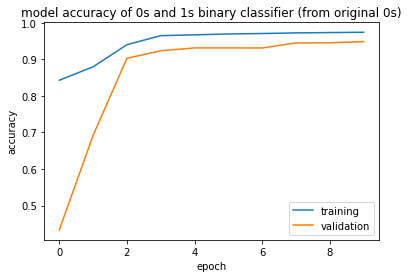

[0.84281325340271, 0.879631519317627, 0.9400789737701416, 0.9648194313049316, 0.9670712351799011, 0.9694399833679199, 0.9706389904022217, 0.972335159778595, 0.9732709527015686, 0.9741482734680176]
Test loss: 0.0897
Test accuracy: 0.981


In [ ]:
# Retrain and evaluate the model
history = model_zeros.fit(x_train, y_train, batch_size=128, epochs=10, verbose=False, validation_split=.1)
loss, accuracy  = model_zeros.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of 0s and 1s binary classifier (from original 0s)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(history.history['accuracy'])
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

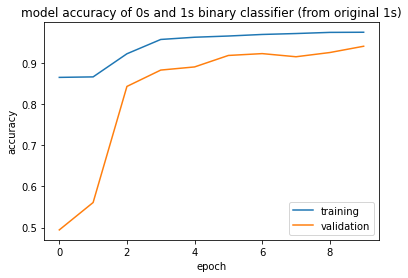

[0.8651264905929565, 0.8663254976272583, 0.9225032925605774, 0.9572744369506836, 0.9626846313476562, 0.965638279914856, 0.9694399833679199, 0.9716917872428894, 0.9744699597358704, 0.9748208522796631]
Test loss: 0.0884
Test accuracy: 0.982


In [ ]:
# Retrain and evaluate the model
history = model_ones.fit(x_train, y_train, batch_size=128, epochs=10, verbose=False, validation_split=.1)
loss, accuracy  = model_ones.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of 0s and 1s binary classifier (from original 1s)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(history.history['accuracy'])
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')